In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


# Problem 2

In [2]:
X = pd.read_csv('hw2-data/Bayes_classifier/X.csv', header=None)
y = pd.read_csv('hw2-data/Bayes_classifier/y.csv', header=None)
X.columns = ['make', 'address','all','3d','our','over',
             'remove','internet','order','mail','receive',
             'will','people','report','addresses','free','business',
             'email','you','credit','your','font','000',
             'money','hp','hpl','george','650','lab',
             'labs','telnet','857','data','415','85',
             'technology','1999','parts','pm','direct','cs',
             'meeting','original','project','re','edu','table',
             'conference',';','(','[','!','$','#']
y.columns = ['label']

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   make        4600 non-null   int64
 1   address     4600 non-null   int64
 2   all         4600 non-null   int64
 3   3d          4600 non-null   int64
 4   our         4600 non-null   int64
 5   over        4600 non-null   int64
 6   remove      4600 non-null   int64
 7   internet    4600 non-null   int64
 8   order       4600 non-null   int64
 9   mail        4600 non-null   int64
 10  receive     4600 non-null   int64
 11  will        4600 non-null   int64
 12  people      4600 non-null   int64
 13  report      4600 non-null   int64
 14  addresses   4600 non-null   int64
 15  free        4600 non-null   int64
 16  business    4600 non-null   int64
 17  email       4600 non-null   int64
 18  you         4600 non-null   int64
 19  credit      4600 non-null   int64
 20  your        4600 non-null   in

In [4]:
y.value_counts()

label
0        2787
1        1813
dtype: int64

In [5]:
data = pd.concat([X, y], axis=1)
data.shape

(4600, 55)

In [6]:
# randomize the data
data = data.sample(frac=1,random_state=42).reset_index(drop=True)

In [7]:
data.shape

(4600, 55)

In [8]:
# split data into 10 groups
data_split = np.array_split(data, 10)

In [9]:
len(data_split)

10

In [10]:
for i in range(10):
    print(data_split[i].shape)

(460, 55)
(460, 55)
(460, 55)
(460, 55)
(460, 55)
(460, 55)
(460, 55)
(460, 55)
(460, 55)
(460, 55)


In [11]:
data_split[0].head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,edu,table,conference,;,(,[,!,$,#,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,7,...,45,0,0,0,1,0,0,0,0,0
2,0,0,9,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,1
4,0,0,5,0,0,0,0,0,0,0,...,3,0,0,0,2,0,0,0,0,0


## Problem 2.a

In [12]:
class Naive_Bayes:
    def __init__(self):
        self.pi = None
        self.lamda = []
    
    def fit(self, X, y):
        self.pi = y.sum() / y.shape[0]
        for i in range(2):
            self.lamda.append((X[y==i].sum() + 1) / ((y==i).sum() + 1))
    
    def predict(self, X):
        prob0 = np.log(1-self.pi) + np.sum(X * np.log(self.lamda[0].T), axis=1) - np.sum(self.lamda[0])
        prob1 = np.log(self.pi) + np.sum(X * np.log(self.lamda[1].T), axis=1) - np.sum(self.lamda[1])
        result = np.zeros(X.shape[0])
        result[prob1 > prob0] = 1
        return result
    
    def confusion_matrix(self, y_true, y_pred):
        TP = ((y_true == 1) & (y_pred == 1)).sum()
        TN = ((y_true == 0) & (y_pred == 0)).sum()
        FP = ((y_true == 0) & (y_pred == 1)).sum()
        FN = ((y_true == 1) & (y_pred == 0)).sum()
        return TP, TN, FP, FN
        
        

In [13]:
# run cross validation
TP, TN, FP, FN = 0, 0, 0, 0
lambda0 = []
lambda1 = []
for i in range(10):
    X_train = pd.concat(data_split[:i] + data_split[i+1:]).iloc[:, :-1]
    y_train = pd.concat(data_split[:i] + data_split[i+1:]).iloc[:, -1]
    X_test = data_split[i].iloc[:, :-1].reset_index(drop=True)
    y_test = data_split[i].iloc[:, -1].reset_index(drop=True)
    model = Naive_Bayes()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    _TP,_TN,_FP,_FN = model.confusion_matrix(y_test, y_pred)
    lambda0.append(model.lamda[0])
    lambda1.append(model.lamda[1])
    
    TP += _TP
    TN += _TN
    FP += _FP
    FN += _FN
    
    
TOTAL = TP + TN + FP + FN
cm = pd.DataFrame([[TN, FP],[FN, TP]], columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print(cm)
print('Prediction Accuracy: ', (TP + TN)/TOTAL)


          Predicted 0  Predicted 1
Actual 0         2297          490
Actual 1           99         1714
Prediction Accuracy:  0.8719565217391304


## Problem 2.b

In [14]:
# calculate the average of lambda
lambda0 = np.array(lambda0)
lambda1 = np.array(lambda1)

In [15]:
lambda0.shape

(10, 54)

In [16]:
lambda1.shape

(10, 54)

In [17]:
avg_lamnda0 = lambda0.mean(axis=0)
avg_lamnda1 = lambda1.mean(axis=0)

In [18]:
print(model.lamda[0].index)

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', ';', '(', '[', '!', '$', '#'],
      dtype='object')


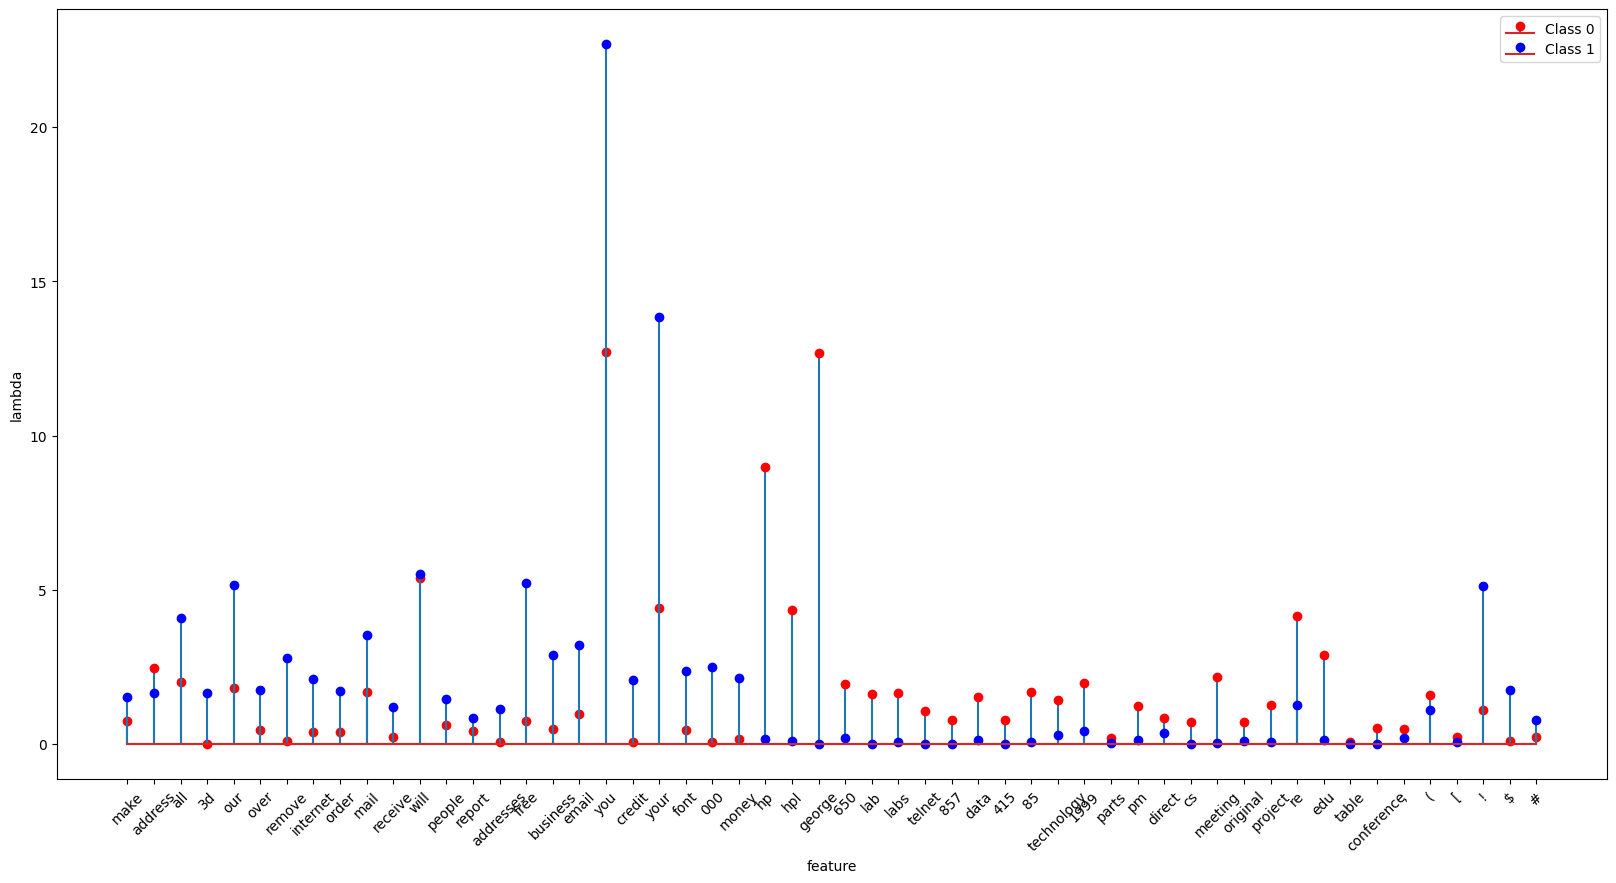

In [19]:
# plot stem plot
fig = plt.figure(figsize=(20, 10))
plt.stem(model.lamda[0].index,avg_lamnda0, label='Class 0', markerfmt='ro')
plt.stem(model.lamda[1].index ,avg_lamnda1, label='Class 1', markerfmt='bo')
plt.xticks(rotation = 45)
plt.ylabel('lambda')
plt.xlabel('feature')
plt.legend()
plt.show()

In [20]:
# feature 16
print('Feature 16: ', model.lamda[0].index[15],', Class 0 Average: ' ,avg_lamnda0[15],', Class 1 Average: ' , avg_lamnda1[15])

# feature 52
print('Feature 52: ', model.lamda[0].index[51],', Class 0 Average: ' ,avg_lamnda0[51],'Class 1 Average: ' , avg_lamnda1[51])

Feature 16:  free , Class 0 Average:  0.7395760282588606 , Class 1 Average:  5.214005750110287
Feature 52:  ! , Class 0 Average:  1.0961513031345622 Class 1 Average:  5.128924515960302


### For feature 16, the word 'free' has higher probability in spam emails than in ham emails.
### For feature 52, the character '!' has higher probability in spam emails than in ham emails, but the difference is not as significant as the difference between 'free' and '!' in spam emails.

## Problem 2.c

In [21]:
X = pd.read_csv('hw2-data/Bayes_classifier/X.csv', header=None)
y = pd.read_csv('hw2-data/Bayes_classifier/y.csv', header=None)
X.columns = ['make', 'address','all','3d','our','over',
             'remove','internet','order','mail','receive',
             'will','people','report','addresses','free','business',
             'email','you','credit','your','font','000',
             'money','hp','hpl','george','650','lab',
             'labs','telnet','857','data','415','85',
             'technology','1999','parts','pm','direct','cs',
             'meeting','original','project','re','edu','table',
             'conference',';','(','[','!','$','#']
y.columns = ['label']

In [22]:
# add bias feature in X
X = pd.concat([X, pd.DataFrame(np.ones(X.shape[0]),columns=['bias'])], axis=1)
X.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,edu,table,conference,;,(,[,!,$,#,bias
0,0,6,6,0,3,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,1.0
1,2,3,5,0,1,3,2,1,0,9,...,0,0,0,0,1,0,4,2,0,1.0
2,1,0,7,0,12,2,2,1,6,3,...,1,0,0,0,1,0,3,2,0,1.0
3,0,0,0,0,6,0,3,6,3,6,...,0,0,0,0,1,0,1,0,0,1.0
4,0,0,0,0,6,0,3,6,3,6,...,0,0,0,0,1,0,1,0,0,1.0


In [23]:
# y = {1, -1}
y = y.replace(0, -1)
print(y.value_counts())

label
-1       2787
 1       1813
dtype: int64


In [24]:
data = pd.concat([X, y], axis=1)
data = data.sample(frac=1,random_state=42).reset_index(drop=True)
data.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,table,conference,;,(,[,!,$,#,bias,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,-1
1,0,0,0,0,0,0,0,0,0,7,...,0,0,0,1,0,0,0,0,1.0,-1
2,0,0,9,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,1.0,-1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,1,0,1.0,1
4,0,0,5,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,1.0,-1


In [25]:
data_split = np.array_split(data, 10)
for i in range(10):
    print(data_split[i].shape)
data_split[0].head()
    

(460, 56)
(460, 56)
(460, 56)
(460, 56)
(460, 56)
(460, 56)
(460, 56)
(460, 56)
(460, 56)
(460, 56)


,make,address,all,3d,our,over,remove,internet,order,mail,...,table,conference,;,(,[,!,$,#,bias,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,-1
1,0,0,0,0,0,0,0,0,0,7,...,0,0,0,1,0,0,0,0,1.0,-1
2,0,0,9,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,1.0,-1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,1,0,1.0,1
4,0,0,5,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,1.0,-1


In [26]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    
    def likelihood(self, X, y):
        h = self.sigmoid(y * np.dot(X, self.weights))
        return np.sum(np.log(h))
    
    def steepest_ascent(self, X, y):
        m = X.shape[0]
        likelihood_history = []
        
        for i in range(self.n_iters):
            gradient = X.T @ (y * (1- self.sigmoid(y * (X @ self.weights))))
            self.weights += self.lr * gradient
            likelihood_history.append(self.likelihood(X, y))
            #print('Iteration: ', i, 'Likelihood: ', likelihood_history[-1])
        return likelihood_history
    
    def newtown_method(self, X, y):
        m = X.shape[0]
        likelihood_history = []
        
        for i in range(self.n_iters):
            gradient = X.T @ (y * (1- self.sigmoid(y * (X @ self.weights)))) / m
            hessian = X.T @ np.diag(np.diag(self.sigmoid(X @ self.weights) * (1 - self.sigmoid(X @ self.weights)).T)) @ X
            self.weights += np.linalg.inv(hessian) @ gradient
            likelihood_history.append(self.likelihood(X, y))
            #print('Iteration: ', i, 'Likelihood: ', likelihood_history[-1])
        return likelihood_history
    
    def fit(self, X, y, method='steepest_ascent'):
        X = np.array(X)
        y = np.array(y).reshape(-1,1)
        self.weights = np.zeros((X.shape[1],1))
        if method == 'steepest_ascent':
            likelihood_history = self.steepest_ascent(X, y)
        else:
            likelihood_history = self.newtown_method(X, y)
        #likelihood_history = self.steepest_ascent(X, y)
        return likelihood_history
    
    def predict(self, X):
        X = np.array(X)
        y_pred = self.sigmoid(np.dot(X, self.weights)).squeeze()
        return pd.Series((y_pred >= 0.5).astype(int)* 2 - 1)
    
    def accuracy(self, y_true, y_pred):
        y_true = pd.Series(y_true)
        y_pred = pd.Series(y_pred.squeeze())
        return np.sum(y_true == y_pred) / len(y_true)
    
    def confusion_matrix(self, y_true, y_pred):
        y_true = pd.Series(y_true)
        y_pred = pd.Series(y_pred.squeeze())
        TP = ((y_true == 1) & (y_pred == 1)).sum()
        TN = ((y_true == -1) & (y_pred == -1)).sum()
        FP = ((y_true == -1) & (y_pred == 1)).sum()
        FN = ((y_true == 1) & (y_pred == -1)).sum()
        return TP, TN, FP, FN

In [27]:
X_train = pd.concat(data_split[:0] + data_split[0+1:]).iloc[:, :-1]
y_train = pd.concat(data_split[:0] + data_split[0+1:]).iloc[:, -1]
X_test = data_split[0].iloc[:, :-1].reset_index(drop=True)
y_test = data_split[0].iloc[:, -1].reset_index(drop=True)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4140, 55)
(4140,)
(460, 55)
(460,)


In [29]:
model = LogisticRegression(learning_rate=0.01/4600, n_iters=100)
model.fit(X_train, y_train, method='newtown_method')
y_pred = model.predict(X_test)
print(model.accuracy(y_test, y_pred))
TP, TN, FP, FN = model.confusion_matrix(y_test, y_pred)
print('TP: ', TP, 'TN: ', TN, 'FP: ', FP, 'FN: ', FN)


0.8760869565217392
TP:  148 TN:  255 FP:  11 FN:  46


In [30]:
TP, TN, FP, FN = 0, 0, 0, 0
likelihood = []
for i in range(10):
    X_train = pd.concat(data_split[:i] + data_split[i+1:]).iloc[:, :-1]
    y_train = pd.concat(data_split[:i] + data_split[i+1:]).iloc[:, -1]
    X_test = data_split[i].iloc[:, :-1].reset_index(drop=True)
    y_test = data_split[i].iloc[:, -1].reset_index(drop=True)
    model = LogisticRegression()
    likelihood.append(model.fit(X_train, y_train))
    y_pred = model.predict(X_test)
    _TP,_TN,_FP,_FN = model.confusion_matrix(y_test, y_pred)
    
    TP += _TP
    TN += _TN
    FP += _FP
    FN += _FN
    
    
TOTAL = TP + TN + FP + FN
cm = pd.DataFrame([[TN, FP],[FN, TP]], columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print(cm)
print('Prediction Accuracy: ', (TP + TN)/TOTAL)

          Predicted 0  Predicted 1
Actual 0         2619          168
Actual 1          165         1648
Prediction Accuracy:  0.927608695652174


In [31]:
print(likelihood[i][:-5])

[-2144.8992804936615, -1964.2547914655654, -1846.8472987082976, -1762.1483726064503, -1697.111920933814, -1644.9374378595048, -1601.7459549268976, -1565.1388498520782, -1533.5443233283504, -1505.8799848007138, -1481.3711784049572, -1459.4457807160786, -1439.6701231357965, -1421.7081687871014, -1405.2945655699186, -1390.2163195319351, -1376.3000040916368, -1363.4026278300062, -1351.4049811583607, -1340.2067003272068, -1329.7225451423292, -1319.879550067733, -1310.6148142304937, -1301.8737658783707, -1293.6087840726284, -1285.7780928065688, -1278.3448653333385, -1271.2764924702965, -1264.54398011066, -1258.1214495001618, -1251.9857199579699, -1246.1159582721127, -1240.493382419047, -1235.1010098518998, -1229.9234425897366, -1224.9466828765462, -1220.1579743759617, -1215.545664808315, -1211.0990866809382, -1206.8084533558197, -1202.6647681745753, -1198.6597447447934, -1194.7857368036773, -1191.03567632951, -1187.4030187804046, -1183.8816945121116, -1180.4660655694124, -1177.1508871644264,

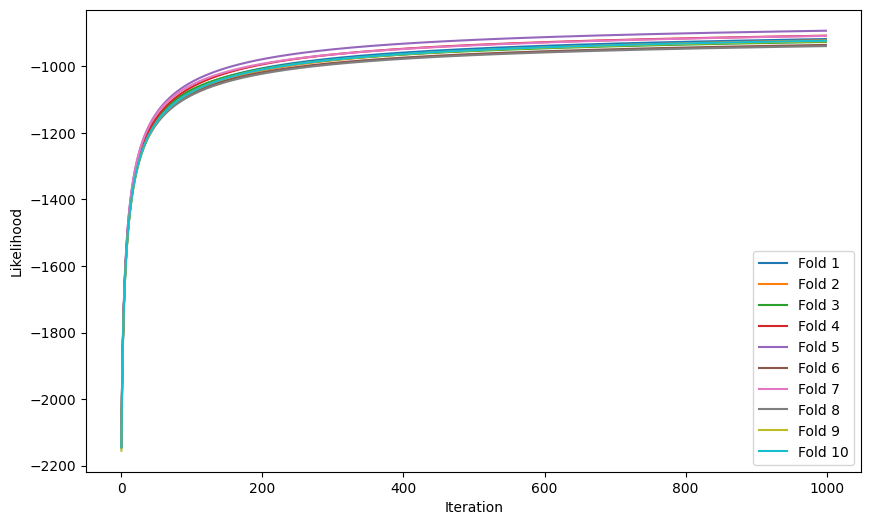

In [32]:
fig = plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(likelihood[i], label='Fold {}'.format(i+1))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Likelihood')
plt.show()

## Problem 2.d

In [33]:
TP, TN, FP, FN = 0, 0, 0, 0
likelihood = []
for i in range(10):
    X_train = pd.concat(data_split[:i] + data_split[i+1:]).iloc[:, :-1]
    y_train = pd.concat(data_split[:i] + data_split[i+1:]).iloc[:, -1]
    X_test = data_split[i].iloc[:, :-1].reset_index(drop=True)
    y_test = data_split[i].iloc[:, -1].reset_index(drop=True)
    model = LogisticRegression(n_iters=100)
    likelihood.append(model.fit(X_train, y_train, method='newtown_method'))
    y_pred = model.predict(X_test)
    _TP,_TN,_FP,_FN = model.confusion_matrix(y_test, y_pred)
    
    TP += _TP
    TN += _TN
    FP += _FP
    FN += _FN
    
    
TOTAL = TP + TN + FP + FN
cm = pd.DataFrame([[TN, FP],[FN, TP]], columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print(cm)
print('Prediction Accuracy: ', (TP + TN)/TOTAL)

          Predicted 0  Predicted 1
Actual 0         2653          134
Actual 1          398         1415
Prediction Accuracy:  0.8843478260869565


In [34]:
likelihood[0][:-5]

[-2869.05591879353,
 -2868.4827869892606,
 -2867.9099318613025,
 -2867.3373531659,
 -2866.7650506595983,
 -2866.193024099247,
 -2865.621273241999,
 -2865.0497978453095,
 -2864.4785976669355,
 -2863.907672464936,
 -2863.3370219976687,
 -2862.766646023796,
 -2862.1965443022773,
 -2861.6267165923723,
 -2861.0571626536407,
 -2860.4878822459405,
 -2859.918875129427,
 -2859.350141064556,
 -2858.7816798120775,
 -2858.2134911330413,
 -2857.6455747887912,
 -2857.0779305409696,
 -2856.5105581515118,
 -2855.94345738265,
 -2855.3766279969113,
 -2854.8100697571167,
 -2854.243782426379,
 -2853.6777657681077,
 -2853.112019546003,
 -2852.5465435240585,
 -2851.9813374665587,
 -2851.4164011380817,
 -2850.8517343034946,
 -2850.287336727957,
 -2849.723208176917,
 -2849.1593484161144,
 -2848.5957572115763,
 -2848.0324343296206,
 -2847.4693795368526,
 -2846.9065926001667,
 -2846.344073286744,
 -2845.7818213640517,
 -2845.2198365998465,
 -2844.6581187621705,
 -2844.0966676193502,
 -2843.5354829399985,
 -2842

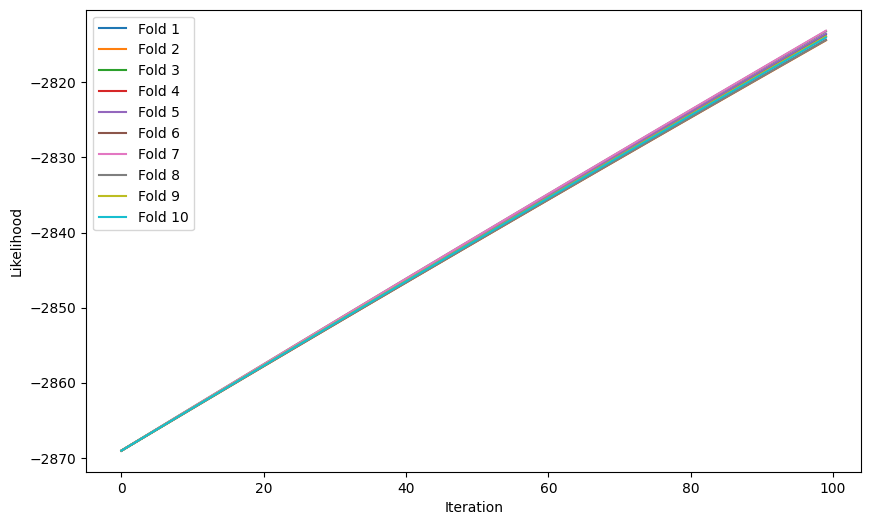

In [35]:
fig = plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(likelihood[i], label='Fold {}'.format(i+1))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Likelihood')
plt.show()